# Feature Selection

## Import Data

In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook 

In [8]:
data = pd.read_csv("../../data/v2/data_merged_2018.csv", sep=";")

In [9]:
data.head()

,uuid,Act_Raw_Score,ActieveCopingPercentage,ActieveCopingScore,Age,AlgIntakeOpleidingsniveauScore_Raw,AlgIntakeWoonsituatieScore_Raw,AlgemeneGezondheidsbelevingScore,Average,BewegingsangstScore,...,TotaalLevel,TotaalScore,TransformerenScore,Ver_Raw_Score,VerminderingVanEisen,VitaliteitScore,educationLevel,livingConditions,got_go,finished_treatment
0,-9214014786609792531,16.0,38.89,26.0,44.0,1.0,4.0,70.0,39.0,27.0,...,1,6.0,9.0,15.0,4.0,80.0,20.0,20.0,1,1.0
1,-9204323589684605317,14.0,47.22,29.0,40.0,6.0,1.0,25.0,31.0,40.0,...,1,5.0,11.0,16.0,7.0,35.0,42.0,10.0,1,1.0
2,-9189315961929324040,18.0,61.11,34.0,30.0,5.0,2.0,75.0,48.0,39.0,...,2,4.0,14.0,20.0,6.0,70.0,41.0,30.0,1,0.0
3,-9187839909081422277,18.0,72.22,38.0,48.0,9.0,4.0,55.0,50.0,37.0,...,2,5.0,14.0,20.0,7.0,60.0,43.0,20.0,0,NaN
4,-9184078185923068786,16.0,55.56,32.0,69.0,3.0,3.0,30.0,79.0,51.0,...,2,9.0,11.0,19.0,8.0,55.0,32.0,40.0,1,0.0


## Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import math

In [11]:
# Separate dataframe into scores, go (yes:no) and finished (yes/no) labels 
X = data.iloc[:,1:-3]
s = data.iloc[:,-3]
y= data.iloc[:,-1]

In [12]:
# Fill in null values
X = X.fillna(X.mean().apply(lambda x: math.floor(x)))
X = X.astype(np.float64)
X.describe()

,Act_Raw_Score,ActieveCopingPercentage,ActieveCopingScore,Age,AlgIntakeOpleidingsniveauScore_Raw,AlgIntakeWoonsituatieScore_Raw,AlgemeneGezondheidsbelevingScore,Average,BewegingsangstScore,Bsi_Age,...,SociaalFunctionerenScore,SubuitslagScore,Terugtrekken,TotaalLevel,TotaalScore,TransformerenScore,Ver_Raw_Score,VerminderingVanEisen,VitaliteitScore,educationLevel
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,...,2376.00000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,17.650673,44.314373,27.948232,48.234428,4.874158,3.948653,45.911195,46.194865,39.097222,48.235269,...,49.11553,2.535774,13.988215,1.475589,8.004630,8.789141,16.582071,6.805976,40.374579,38.799242
std,3.786628,13.244941,4.768698,14.487983,2.175594,10.818069,19.143252,19.505257,7.889888,14.487127,...,25.55849,1.456305,3.866383,0.499509,8.165936,2.513740,3.270409,1.888643,18.444416,11.292498
min,7.000000,0.000000,12.000000,18.000000,1.000000,0.000000,0.000000,0.000000,17.000000,18.000000,...,0.00000,0.000000,7.000000,1.000000,0.000000,4.000000,8.000000,3.000000,0.000000,20.000000
25%,15.000000,36.110000,25.000000,37.000000,3.000000,2.000000,30.000000,33.000000,33.000000,37.000000,...,25.00000,1.000000,11.000000,1.000000,4.000000,7.000000,14.000000,6.000000,30.000000,32.000000
50%,18.000000,44.440000,28.000000,49.000000,5.000000,3.000000,45.000000,46.000000,39.000000,49.000000,...,50.00000,3.000000,14.000000,1.000000,6.000000,9.000000,16.000000,7.000000,40.000000,41.000000
75%,20.000000,52.780000,31.000000,59.000000,7.000000,4.000000,60.000000,59.000000,44.250000,59.000000,...,62.50000,4.000000,16.000000,2.000000,8.000000,10.000000,19.000000,8.000000,50.000000,43.000000
max,28.000000,88.890000,44.000000,89.000000,10.000000,99.000000,100.000000,99.000000,66.000000,89.000000,...,100.00000,5.000000,28.000000,2.000000,52.000000,16.000000,29.000000,12.000000,100.000000,70.000000


## Pipeline: Recursive Feature Elimination with Cross Validation + GridSearchCV

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.features import RFECV
import matplotlib.pyplot as plt

In [7]:
# Extend Pipeline class to get access to the features' importance of the model
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.named_steps['RFC'].feature_importances_
#         self.support_ = self.named_steps['RFC'].support_
        return self

In [8]:
pipeline = [
    ('scaler', StandardScaler()),
    ('RFC', RandomForestClassifier(class_weight="balanced", n_estimators=150))
]
estimator = PipelineRFE(pipeline)

<IPython.core.display.Javascript object>


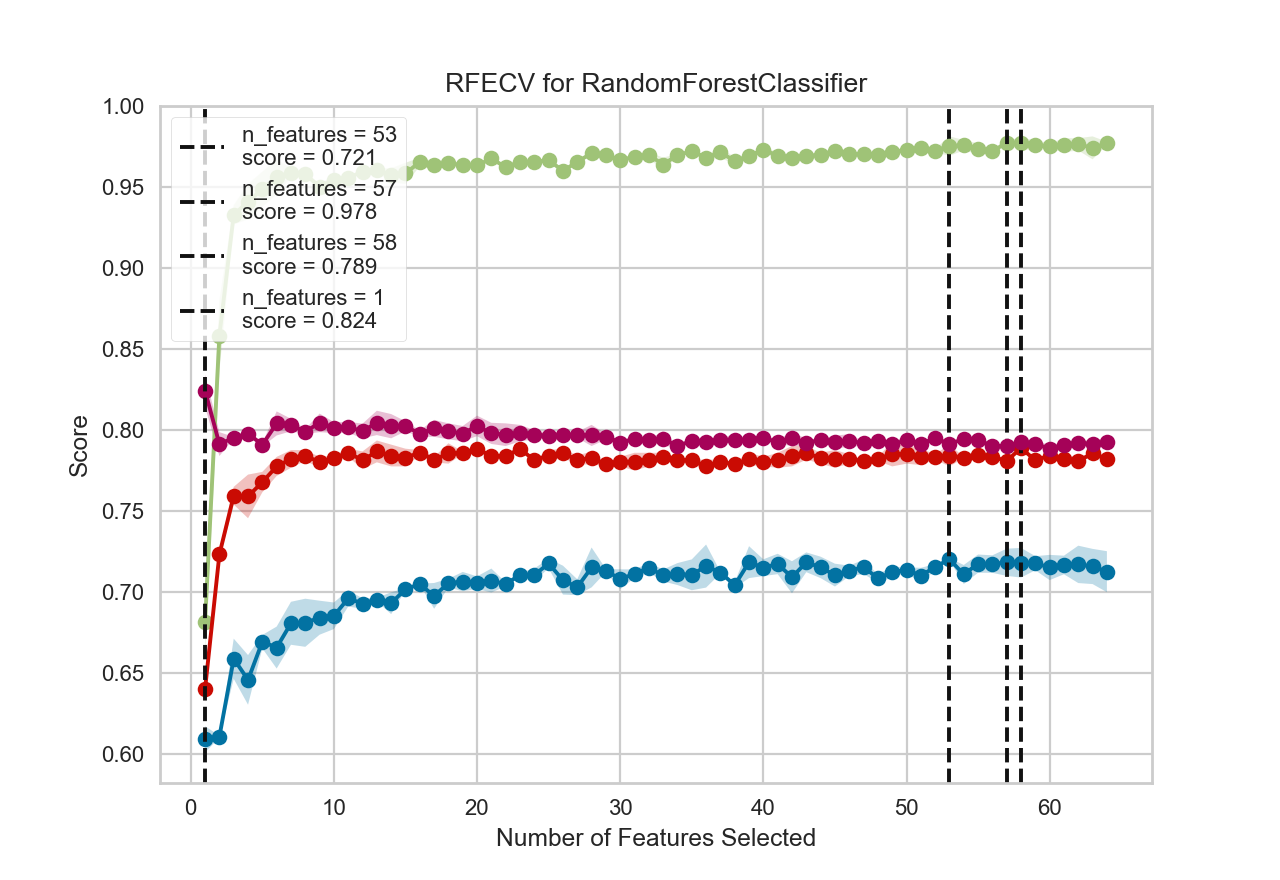

In [25]:
# Stratified cross validation for class imbalance
cv = StratifiedKFold(2)

## Recursive Feature Elimination (each take about 5 minutes to complete given the current parameters)

# ROC AUC --> BLUE
clf_roc = RFECV(estimator, step=5, cv=cv, scoring="roc_auc")
clf_roc.fit(X, s)
clf_roc.finalize()

# Recall --> GREEN
clf_recall = RFECV(estimator, step=5, cv=cv, scoring="recall")
clf_recall.fit(X, s)
clf_recall.finalize()

# Precision --> RED
clf_precision = RFECV(estimator, step=5, cv=cv, scoring="precision")
clf_precision.fit(X, s)
clf_precision.finalize()

# Accuracy --> PURPLE
clf_accuracy = RFECV(estimator, step=5, cv=cv, scoring="accuracy")
clf_accuracy.fit(X, s)
clf_accuracy.finalize()